In [56]:
from argovisHelpers import helpers as avh
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import datetime, random

API_ROOT='https://argovis-api.colorado.edu/'
API_KEY=''

In [67]:
def simple_map(longitudes, latitudes, z=None, polygon=None, title='', fig=None, figIndex=None, marker=None, suppress_colorbar=False):
    if fig:
        ax = fig.add_subplot(figIndex[0], figIndex[1], figIndex[2], projection=ccrs.LambertConformal())
    else:
        fig = plt.figure(figsize=(20,10))
        ax = fig.add_subplot(1, 1, 1, projection=ccrs.LambertConformal())
    gl = ax.gridlines(draw_labels=True,color='black')
    if z:
        s = ax.scatter(longitudes, latitudes, c=z, transform=ccrs.PlateCarree())
        if not suppress_colorbar:
            plt.colorbar(s, pad=0.1)
    else:
        s = ax.scatter(longitudes, latitudes,transform=ccrs.PlateCarree())
    if polygon:
        plt.plot(polygon_lon_lat(str(polygon))['lon'],polygon_lon_lat(str(polygon))['lat'],'-k',transform=ccrs.PlateCarree()) 
    if marker:
        plt.plot(marker[0],marker[1],'Xr', transform=ccrs.PlateCarree(), markersize=20)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS)
    ax.add_feature(cfeature.LAND)
    plt.title(title, fontdict={'fontsize':20})
    
def random_color():
    return "#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])

small region with oxygen at a given qc? Show time evolution for a subset of pressures

In [26]:
natlantic = [[-51.67968750000001,56.029498073208586],[-41.83593750000001,56.42038489717793],[-32.34375000000001,56.80729573996785],[-19.687500000000004,56.22543989970805],[-15.468750000000002,41.319627582090206],[-27.773437500000004,40.78941637031731],[-42.890625,41.58312932313233],[-52.3828125,41.319627582090206],[-51.67968750000001,56.029498073208586]]
datafilter = {
    'polygon': natlantic,
    'startDate': '2020-01-01T00:00:00Z',
    'endDate': '2021-01-01T00:00:00Z',
    'data': 'doxy,1',
    'presRange': [0,1000]
}

floats = avh.query('argo', options=datafilter, apikey=API_KEY, apiroot=API_ROOT)

In [37]:
for i, f in enumerate(floats):
    floats[i]['timestamp'] = datetime.datetime.strptime(floats[i]['timestamp'], '%Y-%m-%dT%H:%M:%S.%fZ')

In [69]:
float_longitudes = [x['geolocation']['coordinates'][0] for x in floats]
float_latitudes  = [x['geolocation']['coordinates'][1] for x in floats]
float_id = [x['_id'].split('_')[0] for x in floats]

## color points on map categorically by float ID
id_colormap = {f: random_color() for f in set(float_id)}
id_colors = [id_colormap[x] for x in float_id]

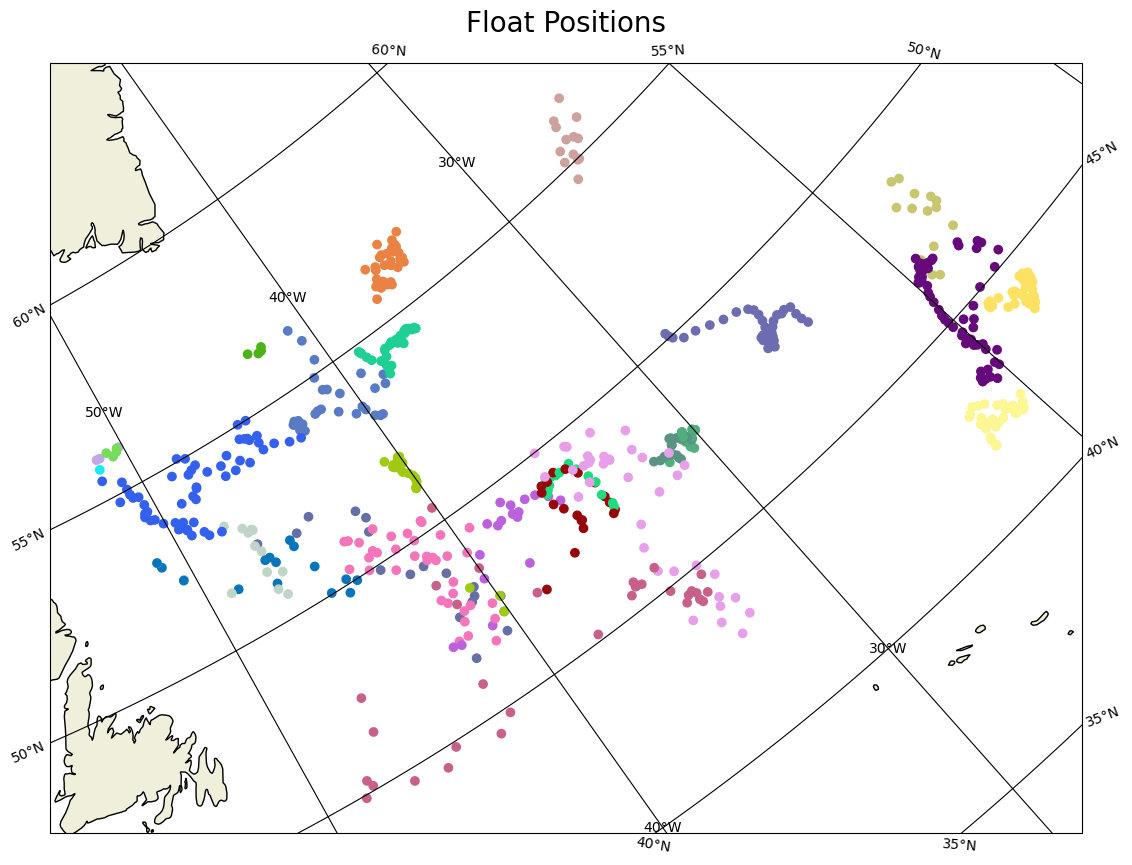

In [70]:
simple_map(float_longitudes,float_latitudes,id_colors, title='Float Positions', suppress_colorbar=True)